In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form, and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example,

In [2]:
import numpy as np
from scipy import sparse

A = sparse.csr_matrix([[1, 2, 0],
                       [0, 0, 3],
                       [4, 0, 5]])
print(A)

  (0, 0)	1
  (0, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5


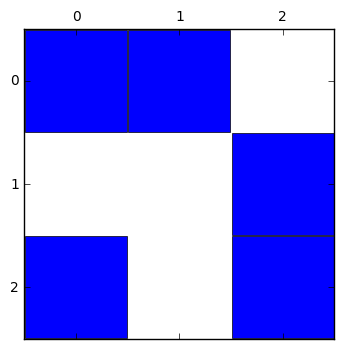

In [3]:
plt.spy(A, markersize=74)

# Why sparse matrices?

In [ ]:
%memit C = np.random.randn(3000, 3000)

In [ ]:
%memit C = sparse.rand(3000, 3000, density=0.01)

# Conversion to dense numpy array

In [4]:
A.toarray()

array([[1, 2, 0],
       [0, 0, 3],
       [4, 0, 5]], dtype=int64)

In [5]:
type(A)

scipy.sparse.csr.csr_matrix

In [6]:
type(A.toarray())

numpy.ndarray

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [7]:
A = sparse.lil_matrix((4, 4)) # empty 4x4 sparse matrix
A[0, 0] = 1  # standard insertion
A[1, 1] = 3
A[2, 2] = A[2, 1] = 1
A[3, 3] = A[3, 0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

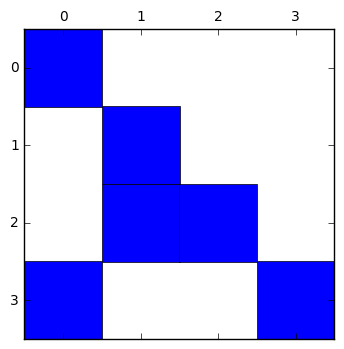

In [8]:
plt.spy(A, markersize=56)

## Converting between different sparse matrix formats:

In [ ]:
A

In [ ]:
A = sparse.csr_matrix(A)
A

In [ ]:
A = sparse.csc_matrix(A)
A

In [ ]:
A = sparse.coo_matrix(A)
A

In [ ]:
print(A.data, A.row, A.col)

# Arithmetic

In [ ]:
A = sparse.csr_matrix(A)

In [ ]:
A.toarray()

In [ ]:
A.T.toarray()  # transpose

In [ ]:
(A + A).toarray()

In [ ]:
(2 * A).toarray()

In [ ]:
v = np.array([1, 2, 3, 4])
# Dot product
print(A.dot(v))  # recommended
print(A * v)  # works as a "matrix" !!!

In [ ]:
(A * A).toarray()

## Why 3 formats?

### Insertion

In [ ]:
nnz = 10000
ii = np.random.randint(10000, size=nnz)
jj = np.random.randint(10000, size=nnz)
vv = np.random.randn(nnz)

In [ ]:
A = sparse.csr_matrix((10000, 10000))
A[ii, jj] = vv

In [ ]:
A = sparse.csc_matrix((10000, 10000))
A[ii, jj] = vv

In [ ]:
A = sparse.lil_matrix((10000, 10000))
A[ii, jj] = vv

### Multiplication

In [ ]:
A

In [ ]:
v = np.array(A.shape[0])
%timeit A.dot(v)

In [ ]:
v = np.array(A.shape[0])
A_csr = sparse.csr_matrix(A)
%timeit A_csr.dot(v)

In [ ]:
v = np.array(A.shape[0])
A_csc = sparse.csr_matrix(A)
%timeit A_csr.dot(v)

# Reference

* [Official document](http://docs.scipy.org/doc/scipy/reference/sparse.html)